# FINAL PROJECT COMP/STAT 331

Author : Pulkit Kalhan

Instructor : Dr. Gabriel Murray 


Resources used 

Robust Scaler

https://benalexkeen.com/feature-scaling-with-scikit-learn/

Label Encoding

https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd

Random Forests

https://towardsdatascience.com/understanding-random-forest-58381e0602d2


Robust Scaler

https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# PART 1 : Exploratory Data Analysis

# Reading the dataset to pandas 

In [2]:
#Read the data file in the 
df_original=pd.read_csv("healthcare-dataset-stroke-data.csv")

#A copy of the original dataframe will be used 

df_copy=df_original

df_copy[0:20]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


Some observation :

The above data set contains data for some adults that had suffered a hearstroke. Some adults given in the dataset either had some kind of heart disease or history of hyptertension which made them suffer a stroke. 

# Basic Statisics Related to data

Basic statisics Related to Data will be anaylzed so that some basic information can be extracted. FIrst we will try to find total features and tuples in the file. THe file should have 12 features and 5110 records

In [3]:
display(df_copy)
print("The Shape of the dataframe is :")
df_copy.shape

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


The Shape of the dataframe is :


(5110, 12)

In [4]:
df_copy.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Let us anaylze the above summary which gives some important information. Let us first analyze the count for all the features that have a numeric value . All the values such as Id, age,hypertension,heart_diseases,avg_glucose_level,stroke have a count of 5110 which is the number of tuples in the file. BMI however has only 4909 records which makes it clear that some of the enteries are indeed missing. In this dataset it is very easy to pin point which feature or features have a missing value however in some cases it wont be that evident . Let us dive more into the dataset . 

In [5]:
#df_info will give info regarding the datatype of the variables or features . Here we can  see what the features are and 
# what is the corresponding data type of the feature

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df_copy.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Before any pre processing can be done some visualization is quiet vital to see how are data looks like. Python provides  libraries such as matplotlib and seaborn which helps in visualization which will be helpful in performing is pre-analysis. In following graphs such as histogram , box plot , distribution plot and relational plot will be used for analysis. Each of these graphs and charts can depict dispersion , relation ,patterns or help us to detect outliers.  

# Graphical Representation 

Box plot helps us to detect outliers. First let us analyze 

BOX Plot for Gender and Age


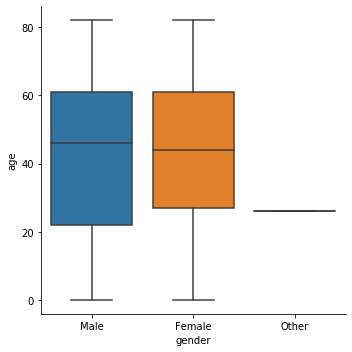

In [7]:
#Let us create some box plots of some relations
print('BOX Plot for Gender and Age')

bx_plot = sns.catplot(x='gender',y='age',data=df_copy,kind='box')
bx_plot.set_titles("Box plot for Gender and Age")

Text(0.5, 1, 'Box plot for Gender and Body Mass Index')

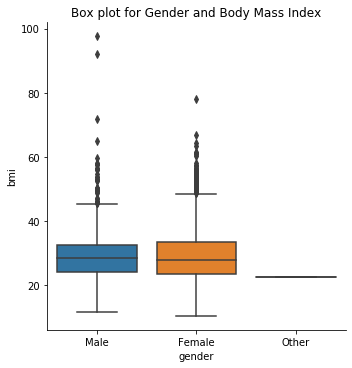

In [9]:
sns.catplot(data=df_copy,y='bmi',x='gender',kind='box')
plt.title("Box plot for Gender and Body Mass Index")

# 

Text(0.5, 1, 'Average Glucose Level of Various Gender')

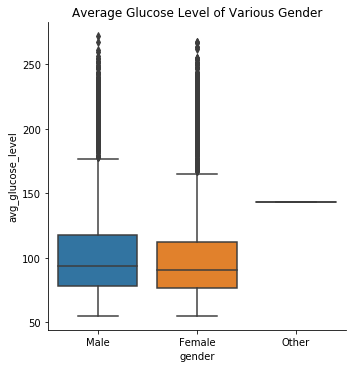

In [10]:
#Let us detect more outliers 

bx_plt_glucose = sns.catplot(x='gender',y='avg_glucose_level',data=df_copy,kind='box')
plt.title("Average Glucose Level of Various Gender")

# Univariate and Categorical Anaylsis

Till now we explored only few paramters of the dataset . Now we will further examine with more bar charts or countplots and see how the above paramters compare with other parameters . Looking at the dataset one can ask simple questions like : is stroke more common in females ? DO heart disease hypertension can be seen in people who dwell in urban areas ?
FOllowing are some more count plots, bar charts which will help us to answer some of these questions 

Gender Frequency for the data set is as follows

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


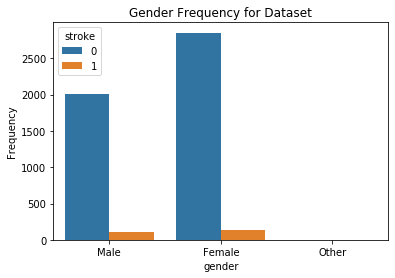

Count for People with Hypertension 

0    4612
1     498
Name: hypertension, dtype: int64


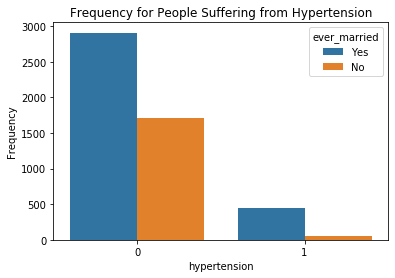

In [11]:
#To observe the data further let us see how many of these record belong to specific features by using Count Plots

#Count Plot for all categorial features. Here will get a general count for the each and every catgeory in the data set
# which will help us to perform a better analysis 

# Count for gender 

print("Gender Frequency for the data set is as follows\n")
print(df_copy['gender'].value_counts())

ax = sns.countplot(data=df_copy, x="gender",hue="stroke")
plt.title("Gender Frequency for Dataset")
plt.ylabel("Frequency")
plt.show()

# Count plot for people suffering  from hypertnsion  
print("Count for People with Hypertension \n")
print(df_copy['hypertension'].value_counts())

#Count plot for people suffering with hypertension . 
ax_2 = sns.countplot(data=df_copy, x="hypertension",hue="ever_married")
plt.title("Frequency for People Suffering from Hypertension")
plt.ylabel("Frequency")
plt.show()


In the above results The total number of people suffering from  hypertension in the this dataset is quiet low as comapred to total count. To perform any sort of early anaylsis with the given information will lead to underestimation and wrong conclusion of our final results . One thing interesting to observe is 1 here mean people who have hypertension. On basis of colour seperation provide by hue we can see people who are not married are less prone to hyper tension. This is interesting !!

Also a larger number of female are present in the dataset. We can anaylze this and make a scatter plot to see if any person of particular gender is more likely to have a stroke or have some conditon such as hyper tension . 



Here below we can see in the dataset a lot individuals work at private workset as compared to government jobs or being self employed. Also if we see the last graph we clearly see that the number of people who indeed suffered a stroke were quiet less as compared to people who didnt suffer  a stroke 

In [ ]:
# we will also create another boxplot for number 

Count for People In Different Work Types

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


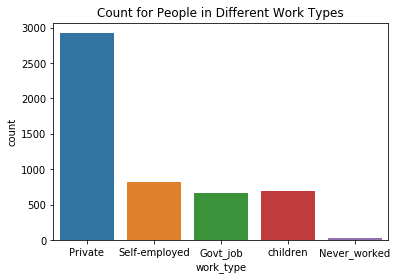

Frequency of Smoking Category 

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


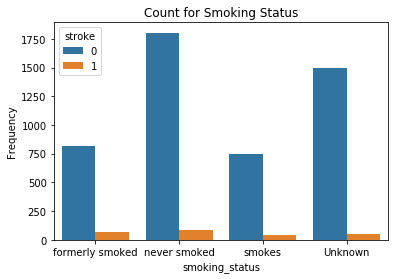


Frequency of Stroke

0    4861
1     249
Name: stroke, dtype: int64


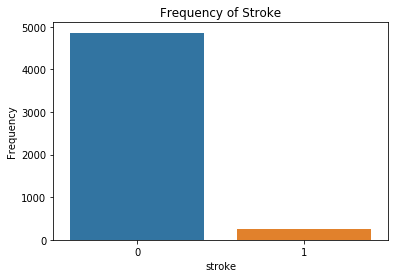

In [12]:
# Some more countplots are as follows
print("Count for People In Different Work Types\n")
print(df_copy['work_type'].value_counts())
ax_3 = sns.countplot(data=df_copy, x="work_type")
plt.title("Count for People in Different Work Types")
plt.show()


print("Frequency of Smoking Category \n")
ax_4 = sns.countplot(data=df_copy, x="smoking_status",hue="stroke")
print(df_copy['smoking_status'].value_counts())
plt.title("Count for Smoking Status")
plt.ylabel("Frequency")
plt.show()

print("\nFrequency of Stroke\n")
ax_4 = sns.countplot(data=df_copy, x="stroke")
print(df_copy['stroke'].value_counts())
#Count plot for Stroke 

plt.title("Frequency of Stroke")
plt.ylabel("Frequency")
plt.show()

Till now we explored only few paramters of the dataset . Now we will further examine more bar charts or countplots and see how the above paramters compare with other parameter . To make it simple one can ask simple questions like is stroke more common in females ? DO heart disease or hypertension can be seen in people who dwell in urban areas ?
FOllowing are some more count plots, bar charts which will help us to answer some of these questions 

# Scatter Plots,Histograms and Distribution Plots For Numeric Variable

Let us now analyze some numeric data and see how is it distributed . We can do so by making a histogram



For numeric data the following histogram can give use an insight how well the numeric data is distributed . For instance we know the mean value for BMI is 28-29 .Looking at the histogram suggest that the data might be right skewed or positively skewed. It is evident that imputating  missing values using Mean will not be the best approach as the mean will tend to overestimate the missing values . Similarly Average Blood sugar level is extremely right skewed.

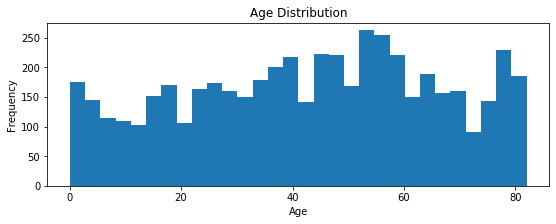

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


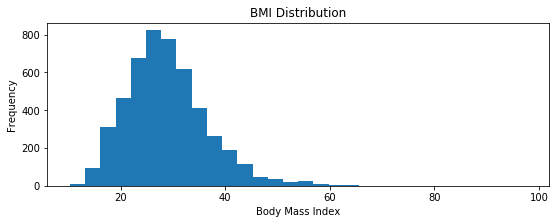

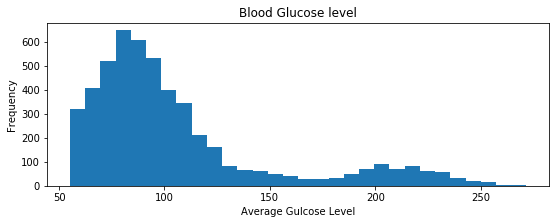

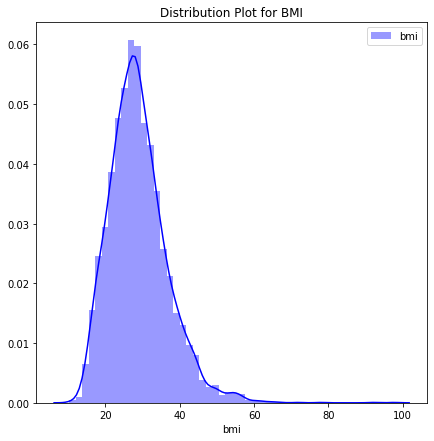

In [13]:

plt.figure(figsize = (9,3))
plt.hist(df_copy['age'],bins=30)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()

#HIstogram for numberic variables

plt.figure(figsize = (9,3))
plt.hist(df_copy['bmi'],bins=30)
plt.xlabel("Body Mass Index")
plt.title("BMI Distribution")
plt.ylabel("Frequency")
plt.show()


#Distriution Plot /HIstogram for numberic variables using seaborn
plt.figure(figsize = (9,3))
plt.hist(df_copy['avg_glucose_level'],bins=30)
plt.xlabel("Average Gulcose Level")
plt.title("Blood Glucose level")
plt.ylabel("Frequency")
plt.show()

##Distriution Plot for BMI
fig = plt.figure(figsize=(7,7))
sns.distplot(df_copy.bmi, color="blue", label="bmi", kde= True)
plt.title("Distribution Plot for BMI")
plt.legend()
plt.show()


<Figure size 720x21600 with 0 Axes>

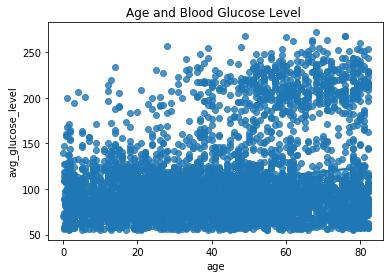

<Figure size 720x21600 with 0 Axes>

In [14]:
pair_plot=sns.regplot(data=df_copy, x='age',y='avg_glucose_level')
plt.title("Age and Blood Glucose Level ")
plt.figure(figsize = (10,300))

<Figure size 720x21600 with 0 Axes>

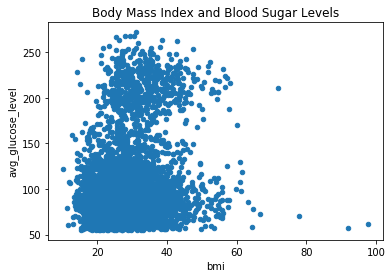

<Figure size 720x21600 with 0 Axes>

In [15]:
df_copy.plot.scatter(x='bmi',y='avg_glucose_level',title="Body Mass Index and Blood Sugar Levels")
plt.figure(figsize = (10,300))

To get a general idea of how variables are related related to each other a heat map can be used to display all the correlational values between the variables . Supopose if consider the age row and the stroke column it can be concluded that age and stroke have some kind of positive correlation.  Similarly BMI and age also have some positve correlation. Just like a scatter plot, using a heat map with correlational values will be helpful to find hidden dependencies or relations. This will also help us to improve our predictions.

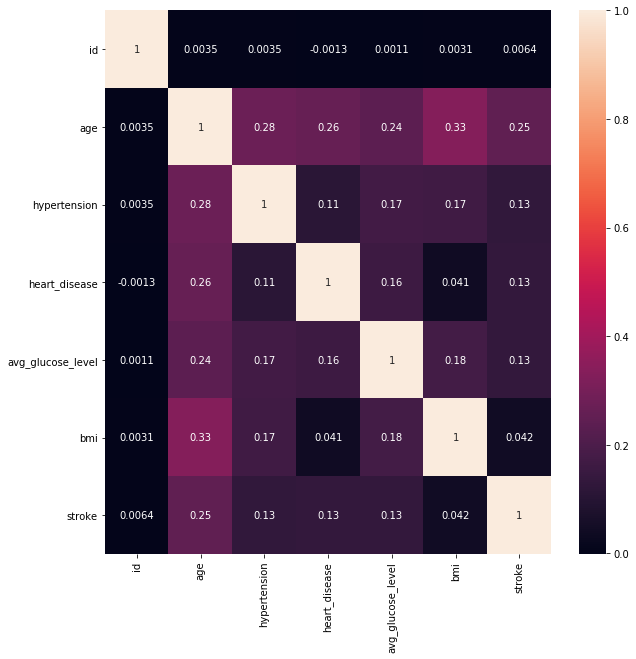

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df_copy.corr(),annot=True);

# PART 2 DATA PRE-PROCESSING

After Performing some EDA some major flaws in the dataset were detected . First such flaw is data imbalanced which is evident by looking at count charts box plot and scatter plots. The number of people who suffered stroke are comparatively much much smaller than the people who didnt suffer from a stroke. From our count plot statistics count only 249 out of 5110 (about 4.8%) suffered a stroke which contributes to lower percentage of the total dataset. 

Secondly the dataset has a lot of categorical features which simply cannot be dropped or ignored. For a dataset having so many categorical features  a unique label has to assigned to each of the categorical attribute. 

Thirdly the data set has a lot of outliers which has lead to anomlies . By performing various steps below we will try to tackle the problem 

In [17]:
df_copy

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


As most of the data is categorical and just dropping the categorical data will not provide an accurate predicition some of the categorical data must is  need . FOr instance if BMI score need to be imputed using a regression model , Information gender information is quiet vital because BMI tend to vary between females and males  

# Label Encoding  

Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering. A label is actually a number or a string that represents a particular set of entities. Labels helps the model in better understanding of the dataset and enables the model to learn more complex structures. For example, if our dataset contains a variable ‘Gender’ with labels ‘Male’  ‘Female’ and 'Other', then the label encoder would convert these labels into a number format and the resultant outcome would be [0,1,2].

In [18]:
#We will label encode all the features which are of type string . Gender ,ever married, work type, residence type ,smoking 
#status will be assigned a unique label . One important note to keep in mind is Label encoding can distort relations 
#and lead to incorrect predictions and if thats the case One Hot Encoding can also be used 
#The reason for performing the encoding is because we cannot use string or categories 
# in machine learning models or regression models 

#Let us create an instance of label encoder


obtype=['gender','ever_married','work_type','Residence_type','smoking_status']

gen_encode=LabelEncoder()
mar_encode=LabelEncoder()
work_encode=LabelEncoder()
res_encode=LabelEncoder()
smo_encode=LabelEncoder()


df_copy['gender']=gen_encode.fit_transform(df_copy['gender'])
df_copy['ever_married']=mar_encode.fit_transform(df_copy['ever_married'])
df_copy['work_type']=work_encode.fit_transform(df_copy['work_type'])
df_copy['Residence_type']=res_encode.fit_transform(df_copy['Residence_type'])
df_copy['smoking_status']=smo_encode.fit_transform(df_copy['smoking_status'])

display(df_copy)
                                                

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


The above output shows all the categorical data has been converted to numeric data .The data set is now ready to perform any kind of imputation. If instead SimpleImputer is used and the  missing value is be filled with mean or median which ever is choosen , then encoding can be performed after .

# Missing Value Imputation for BMI

Instead of using standard Mean Median or mode for imputation for missing value imputation , a regression model can used to for imputing the missing values instead of using simple mean median mode. Also one benefit of choosing such apporach is that it preserves relationships among variables involved in the imputation model, but not variability around predicted values. Here deterministic Regression Imputation will be used . In Deterministic Regression Imputation, we replace the missing data with the values predicted in our regression model and repeat this process for each variable

In [ ]:
#Let us first drop id as it irrelevant feature for our analysis 
#Observe the features have changed from 12 to 11 because the id column doesnt exists anymore
df_copy

In [19]:
# A linear regression model willbe used to impute the missing BMI values


# First drop the rows that contains the missing values i.e the BMI values in this case
#Only those tuples which have the complete information will be displayed 
df_without_miss_bmi=df_copy
df_without_miss_bmi=df_without_miss_bmi.dropna(axis=0)

display(df_without_miss_bmi)
display(df_copy)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,0,13.0,0,0,0,4,0,103.08,18.6,0,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


After filtering out the empty BMI columns, it is required to split the dataset into dependent and independent variables.
Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is considered to be an explanatory variable(independent variable), and the other is considered to be a dependent variable. Linear Regression is a simple but commonly used for analysis. 

Here X will contain all the features that are independent features. As BMI is related mostly with age and a person's weight all other variables will be left out as they have an impact on the prediction. Also the reason for not including average blood glucose level is because there is no scientic evidence till date establishes a relation between BMI and glooad glucose level . Some research paper do cite that Higher BMI do result in Type 2 diabetes and high glucose level but for the will not include it in our model

In [20]:
# The features will comprise of X variables and the outcomes / prediction  will be stored in Y variable

#We will extract the X features i.e are gender and age 
X = df_without_miss_bmi.iloc[:,1:3].values
print("Here are  features of  X")
display(X)

# BMI is the outcome variable or the varibale we will like to predict
print("\nHere is the outcome variable")
y=df_without_miss_bmi['bmi']
print(y)

Here are  features of  X


array([[ 1., 67.],
       [ 1., 80.],
       [ 0., 49.],
       ...,
       [ 0., 35.],
       [ 1., 51.],
       [ 0., 44.]])


Here is the outcome variable
0       36.6
2       32.5
3       34.4
4       24.0
5       29.0
        ... 
5104    18.6
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 4909, dtype: float64


# Linear Regression Model For Missing Value Imputation

In [21]:
# Create a linear model and fit the training data set to the linear model. We will be training our model with the the rcords
# which are complete i.e. using records 4909 and then the remaining i.e missing ones we will predict them using Linear 
# Regression 

lm=linear_model.LinearRegression().fit(X,y)

#Values of intercept and slope of the regression line
print("\n------------------------------Coefficient  Value--------------------------------")
print(lm.coef_)
print("\n------------------------------Intercept Value--------------------------------")
print(lm.intercept_)


------------------------------Coefficient  Value--------------------------------
[-0.262369    0.11591871]

------------------------------Intercept Value--------------------------------
24.031926085732373


In [22]:
# Now grab all the records / tuples of the file oncluding the ones with the missing BMI score 

# Remember ALl records are present in the df_copy object which include missing BMI values 
X_all=df_copy.drop(['id','hypertension','heart_disease','ever_married','work_type','Residence_type',
                    'avg_glucose_level','bmi','smoking_status','stroke'],axis=1)
preds = lm.predict(X_all)

print(preds)
df_copy

[31.53611042 31.10296718 33.0430536  ... 28.08908081 29.68141111
 29.13234917]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,NaN,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


# Imputation Using Linear Regression

In [23]:
#Impute values for all the missing BMI with x being independent variable Age and gender . The preds_missing has 
# all the predicted values of the remaining record i.e for the records which were missing bmi

missing = df_copy['bmi'].isnull()
preds_missing = lm.predict(X_all.loc[missing, :])
print(preds_missing)

[31.10296718 30.87112977 32.81121619 30.37692335 30.49284206 30.60876077
 31.3348046  32.72582907 32.84174778 32.81121619 31.3348046  32.81121619
 32.46346007 32.84174778 29.94378012 31.68256072 30.49284206 30.49284206
 32.84174778 32.37807296 32.81121619 32.72582907 28.43683693 31.30427301
 33.1895039  32.84174778 31.99978525 24.18493878 32.9271349  31.1883543
 33.1895039  33.07358519 33.30542261 32.95766649 30.84059818 32.9271349
 32.34754137 32.84174778 32.34754137 31.99978525 27.7107931  32.84174778
 31.3348046  30.84059818 30.02916723 28.40630534 29.596024   30.84059818
 27.36303698 29.01643047 25.07519444 29.79732982 32.95766649 26.0025441
 32.26215425 28.08908081 26.69805634 28.40630534 26.69805634 32.26215425
 25.27650027 32.23162266 24.37968221 29.68141111 27.82671181 32.49399166
 24.72743832 29.10181758 32.26215425 30.29153624 33.30542261 29.71194271
 32.11570395 26.66752475 26.89936216 29.68141111 29.333655   24.58098803
 31.10296718 26.92989375 27.24711828 31.99978525 29.21

# Inserting the Predicted Values

In the above step we have imputed all the missing BMI scores that were originally present in the dataset. But now for any BMI that was NA, we want to replace it with the predicted value. But for any BMI that was not missing, we just want to use its original value, not the predicted value as we dont want .This can be achieved by following 


In [24]:
#Now the following code will only  replace  the missing BMI with predicted BMI 
df_copy.loc[missing,'bmi']=preds_missing

In [25]:
#Print  out the data frame and check the count for any more missing values
print(df_copy.isnull().sum())
display(df_copy)

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,51676,0,61.0,0,0,1,3,0,202.21,31.102967,2,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0,80.0,1,0,1,2,1,83.75,33.305423,2,0
5106,44873,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,19723,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,37544,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


# Standardization Using Robust Scaler

 As our dataset contains a lot of outliers using Standard Scaler or Min Max scaler will not be the best approach. Standard Scaler takes the mean as zero and it scales the data to unit variance . The Min Max Scaler works by rescaling the value from [0,1]. Robust scaler takes input variables in the presence of outliers and ignores  the outliers from the calculation of the mean and standard deviation. Then it use the calculated values to scale the variable. Hence the robust scaler is not influenced much by large outliers.

In [26]:
#Redefine X and y here y

y=df_copy['stroke']
X=df_copy.drop(['stroke','id'],axis=1)
print(y.value_counts())

from sklearn import preprocessing

norm = preprocessing.RobustScaler()
ndf=norm.fit_transform(X)
X = pd.DataFrame(ndf, index=X.index, columns=X.columns)
X


0    4861
1     249
Name: stroke, dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,0.611111,0.0,1.0,0.0,0.0,0.0,3.712987,0.923077,-0.5
1,0.0,0.444444,0.0,0.0,0.0,1.0,-1.0,2.994300,0.319007,0.0
2,1.0,0.972222,0.0,1.0,0.0,0.0,-1.0,0.380920,0.472527,0.0
3,0.0,0.111111,0.0,0.0,0.0,0.0,0.0,2.153481,0.681319,0.5
4,0.0,0.944444,1.0,0.0,0.0,1.0,-1.0,2.231917,-0.461538,0.0
...,...,...,...,...,...,...,...,...,...,...
5105,0.0,0.972222,1.0,0.0,0.0,0.0,0.0,-0.220790,0.561035,0.0
5106,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.904193,1.296703,0.0
5107,0.0,-0.277778,0.0,0.0,0.0,1.0,-1.0,-0.241417,0.263736,0.0
5108,1.0,0.166667,0.0,0.0,0.0,0.0,-1.0,2.019406,-0.285714,-0.5


# PART 3 Model Selection 

Now last step is to create a model using the data set and see how well can the model perdict . Some classifaction algorithms like Logistic Regression and Random Forests will be used .

# Splitting data into Training Set 

In [27]:
#splitting the dataset into training data set and test data set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,train_size=0.75, random_state=10)

# Prediction Using Logistic Regression

Accuracy on Train set 0.9532881002087683
Accuracy on Test set 0.9444444444444444

----------------------------------------------------------------------

The Classification report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1208
           1       0.00      0.00      0.00        70

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.89      0.94      0.92      1278



----------------------------------------------------------------------

Confusion Matrix


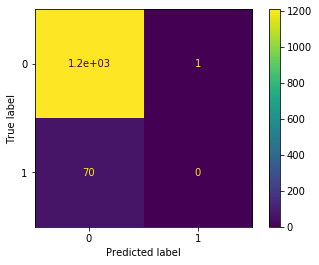

In [28]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# fit the model
lr.fit(X_train, y_train)

y_predict_LR = lr.predict(X_test)


# accuracy score
LR_train_score = lr.score(X_train,y_train)
LR_test_score = lr.score(X_test,y_test)



print('Accuracy on Train set',LR_train_score)
print('Accuracy on Test set',LR_test_score)


print("\n----------------------------------------------------------------------\n")
print("The Classification report: \n{}\n".format(classification_report(y_test, y_predict_LR)))

print("\n----------------------------------------------------------------------\n")
print("Confusion Matrix")
plot_confusion_matrix(lr,X_test,y_test)


# Prediction Using KNN Regression

In [29]:
#using a regression model to see how well it predicts .KNN classifier should be used for a better score


knn = KNeighborsRegressor(n_neighbors=10).fit(X_train,y_train)
y_predict_KNN = knn.predict(X_test)

r2 = r2_score(y_test, y_predict_KNN)
print('R2 Score :', r2)



R2 Score : -0.03618353831598875


# Prediction Using Random Forest 

Random forest is a type of supervised machine learning algorithm based on ensemble learning. Ensemble learning is a type of learning where different types of algorithms are joined  form a more powerful prediction model. The random forest algorithm combines multiple algorithm of the same type i.e. multiple decision trees, resulting in a forest of trees.

confussion matrix
[[1205    3]
 [  70    0]]
-------------------------------------------
Accuracy of Random Forest: 94.28794992175273 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1208
           1       0.00      0.00      0.00        70

    accuracy                           0.94      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.89      0.94      0.92      1278



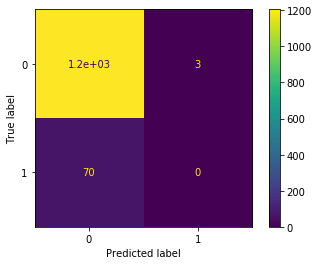

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=15, random_state=10,max_depth=8)
rf_clf.fit(X_train,y_train)
rf_clf_predicted = rf_clf.predict(X_test) 

rf_clf_conf_matrix = confusion_matrix(y_test, rf_clf_predicted)
rf_acc_score = accuracy_score(y_test, rf_clf_predicted)
print("confussion matrix")
print(rf_clf_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,rf_clf_predicted))
plot_confusion_matrix(rf_clf,X_test,y_test)

Conculsion :Though some of our models  shows high accuracy it will not be wise to draw conclusions from this dataset. One of the major flaw in this data set is that people who did suffer a stroke make up less than  5% of the dataset and hence the confusion matrix shows all 1208 people as true positives. One way to increase accuracy will be consider a technique known as Over Sampling the dataset also know as SMOT(Synthetic Minority Over-sampling Technique) described by Nitesh Chawla, et al. in their 2002 paper named for the technique titled “SMOTE: Synthetic Minority Over-sampling Technique.”  SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line. This will help in more realistic prediction






Link for SMOTE 
(https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/)